### Problem Statement:

Consider yourself to be Sam who is a data scientist. He has been approached by
a retail car showroom to help them segregate the cars into different clusters.

### Tasks To Be Performed:

1. Building the K-Means clustering algorithm:  
a. Start off by extracting the ‘mpg’, ‘disp’ & ‘hp’ columns from the ‘mtcars’ data.frame. Store the result in ‘car_features’  
b. Build the K-Means algorithm on top of ‘car_features’. Here, the number of clusters should be 3  
c. Bind the clustering vector to ‘car_features’  
d. Extract observations belonging to individual clusters  

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('cars-1.csv')

In [3]:
data.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
data.isnull().sum()

model    0
mpg      0
cyl      0
disp     0
hp       0
drat     0
wt       0
qsec     0
vs       0
am       0
gear     0
carb     0
dtype: int64

In [5]:
data.duplicated().sum()

0

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [7]:
car_features = data.loc[:, ['mpg', 'disp', 'hp']]

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

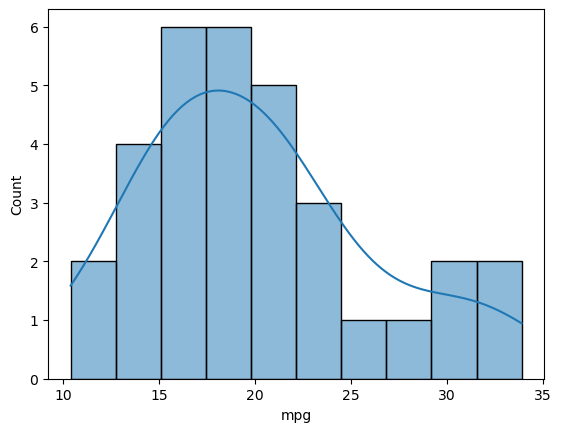

In [13]:
sns.histplot(car_features, x = 'mpg', bins  =10, kde = True);

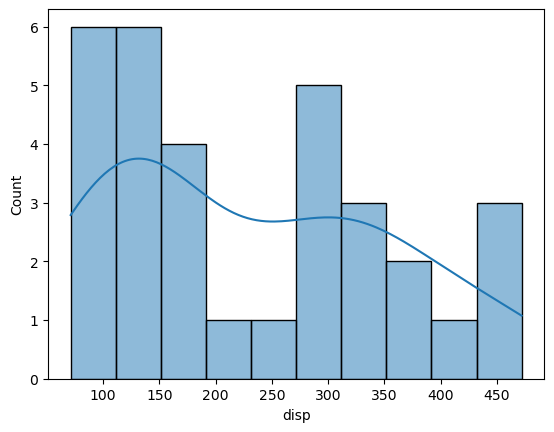

In [14]:
sns.histplot(car_features, x = 'disp', bins  =10, kde = True);

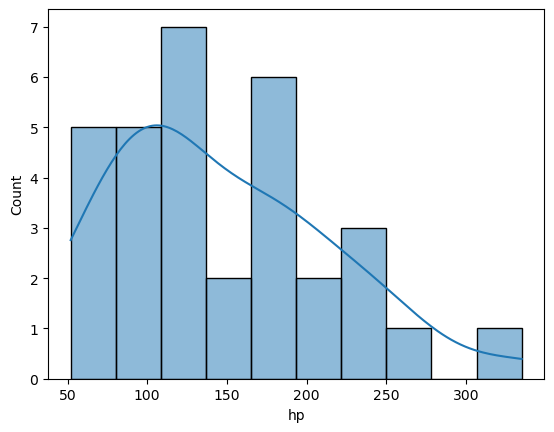

In [15]:
sns.histplot(car_features, x = 'hp', bins  =10, kde = True);

In [28]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [42]:
scaler1 = MinMaxScaler()

In [43]:
X = scaler1.fit_transform(car_features)

In [44]:
X

array([[0.45106383, 0.22175106, 0.204947  ],
       [0.45106383, 0.22175106, 0.204947  ],
       [0.52765957, 0.0920429 , 0.14487633],
       [0.46808511, 0.46620105, 0.204947  ],
       [0.35319149, 0.72062859, 0.43462898],
       [0.32765957, 0.38388626, 0.18727915],
       [0.16595745, 0.72062859, 0.6819788 ],
       [0.59574468, 0.1885757 , 0.03533569],
       [0.52765957, 0.17385882, 0.15194346],
       [0.37446809, 0.24070841, 0.25088339],
       [0.31489362, 0.24070841, 0.25088339],
       [0.25531915, 0.51060115, 0.45229682],
       [0.29361702, 0.51060115, 0.45229682],
       [0.20425532, 0.51060115, 0.45229682],
       [0.        , 1.        , 0.54063604],
       [0.        , 0.97006735, 0.57597173],
       [0.18297872, 0.9201796 , 0.62897527],
       [0.93617021, 0.01895735, 0.04946996],
       [0.85106383, 0.01147418, 0.        ],
       [1.        , 0.        , 0.0459364 ],
       [0.47234043, 0.12222499, 0.1590106 ],
       [0.21702128, 0.61586431, 0.34628975],
       [0.

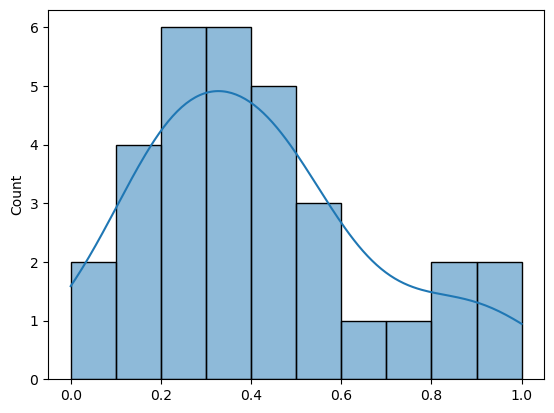

In [45]:
sns.histplot(data = X[:, 0], bins = 10, kde = True);

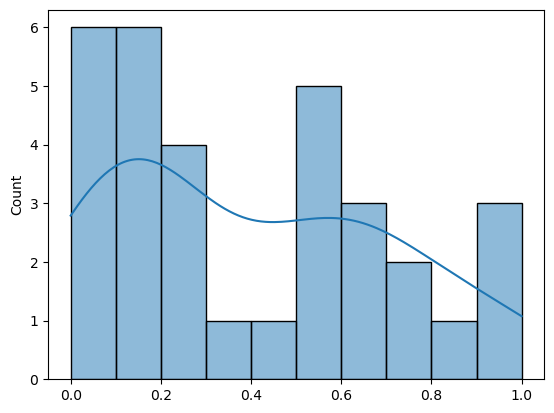

In [46]:
sns.histplot(data = X[:, 1], bins = 10, kde = True);

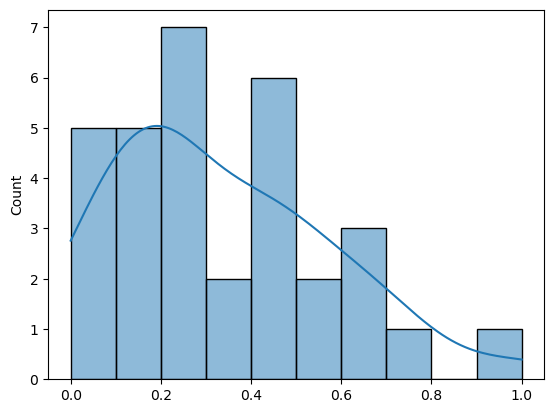

In [47]:
sns.histplot(data = X[:, 2], bins = 10, kde = True);

In [41]:
from sklearn.cluster import KMeans

In [50]:
kmean = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)

In [51]:
label_pred = kmean.fit_predict(X)

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [52]:
label_pred = pd.Series(label_pred, name = 'Label')

In [53]:
car_features['Label'] = label_pred

In [54]:
for value in car_features['Label'].unique():
    print(f"Label = {value}")b
    print(car_features.iloc[:,:-1][car_features['Label'] == value])

Label = 0
     mpg   disp   hp
0   21.0  160.0  110
1   21.0  160.0  110
2   22.8  108.0   93
3   21.4  258.0  110
5   18.1  225.0  105
7   24.4  146.7   62
8   22.8  140.8   95
9   19.2  167.6  123
10  17.8  167.6  123
20  21.5  120.1   97
29  19.7  145.0  175
31  21.4  121.0  109
Label = 1
     mpg   disp   hp
4   18.7  360.0  175
6   14.3  360.0  245
11  16.4  275.8  180
12  17.3  275.8  180
13  15.2  275.8  180
14  10.4  472.0  205
15  10.4  460.0  215
16  14.7  440.0  230
21  15.5  318.0  150
22  15.2  304.0  150
23  13.3  350.0  245
24  19.2  400.0  175
28  15.8  351.0  264
30  15.0  301.0  335
Label = 2
     mpg   disp   hp
17  32.4   78.7   66
18  30.4   75.7   52
19  33.9   71.1   65
25  27.3   79.0   66
26  26.0  120.3   91
27  30.4   95.1  113


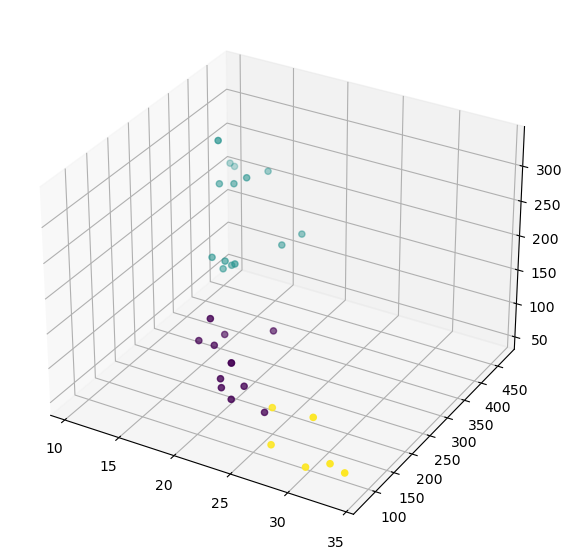

In [61]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(xs = car_features['mpg'], ys = car_features['disp'], zs = car_features['hp'], c = car_features['Label'])

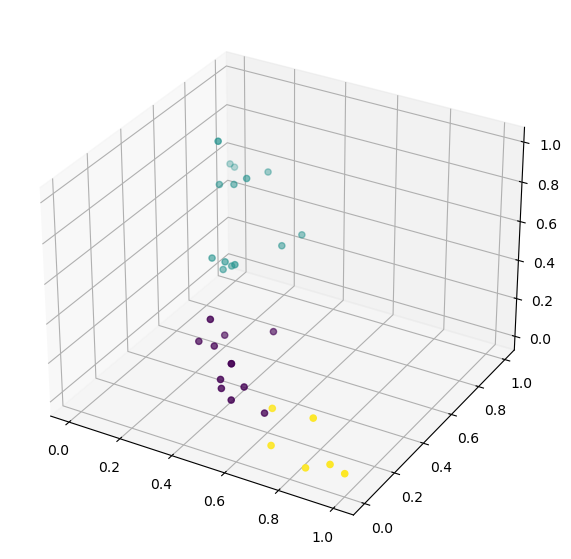

In [62]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(xs = X[:,0], ys = X[:,1], zs = X[:,2], c = label_pred)

2. On the same ‘car_features’dataset build a K-Means algorithm, where the number of clusters is 5  
a. Bind the clustering vector to ‘car_features’  
b. Extract observations belonging to individual clusters  

In [70]:
from sklearn.metrics import silhouette_score
inertia = []
mean_silhouette = []
models = []
for k in range(2, 11):
    models.append(KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42))
    models[k-2].fit(X)
    label_pred = models[k-2].transform(X)
    inertia.append(models[k-2].inertia_)
    mean_silhouette.append(silhouette_score(X, models[k-2].labels_))

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows wi

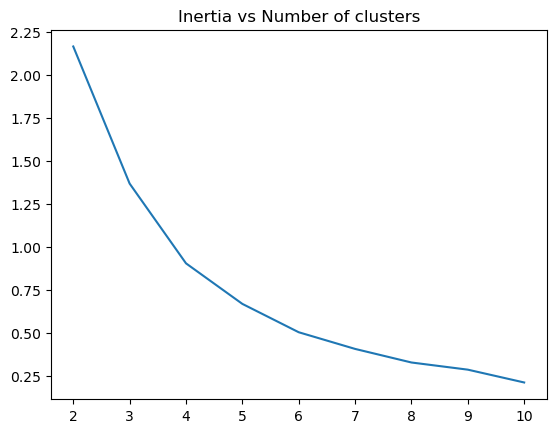

In [72]:
plt.plot(range(2,11), inertia)
plt.title('Inertia vs Number of clusters');

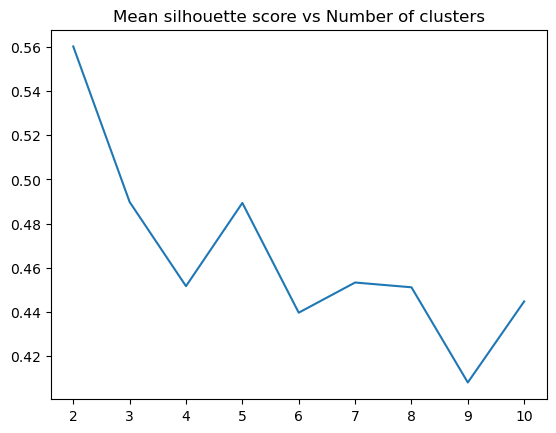

In [73]:
plt.plot(range(2,11), mean_silhouette)
plt.title('Mean silhouette score vs Number of clusters');

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.5602126541739177


C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.4898248589719836


C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.4517071807507247


C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.4893955523678689


C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.4397034742387813


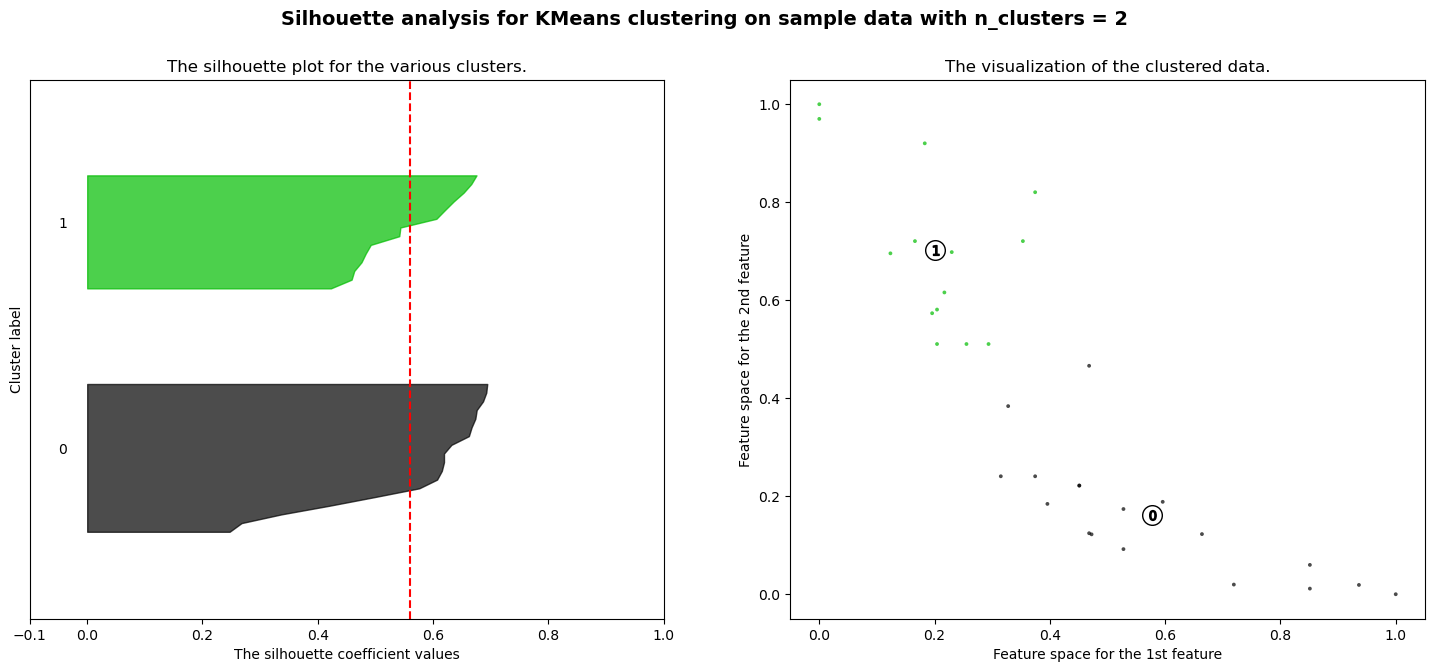

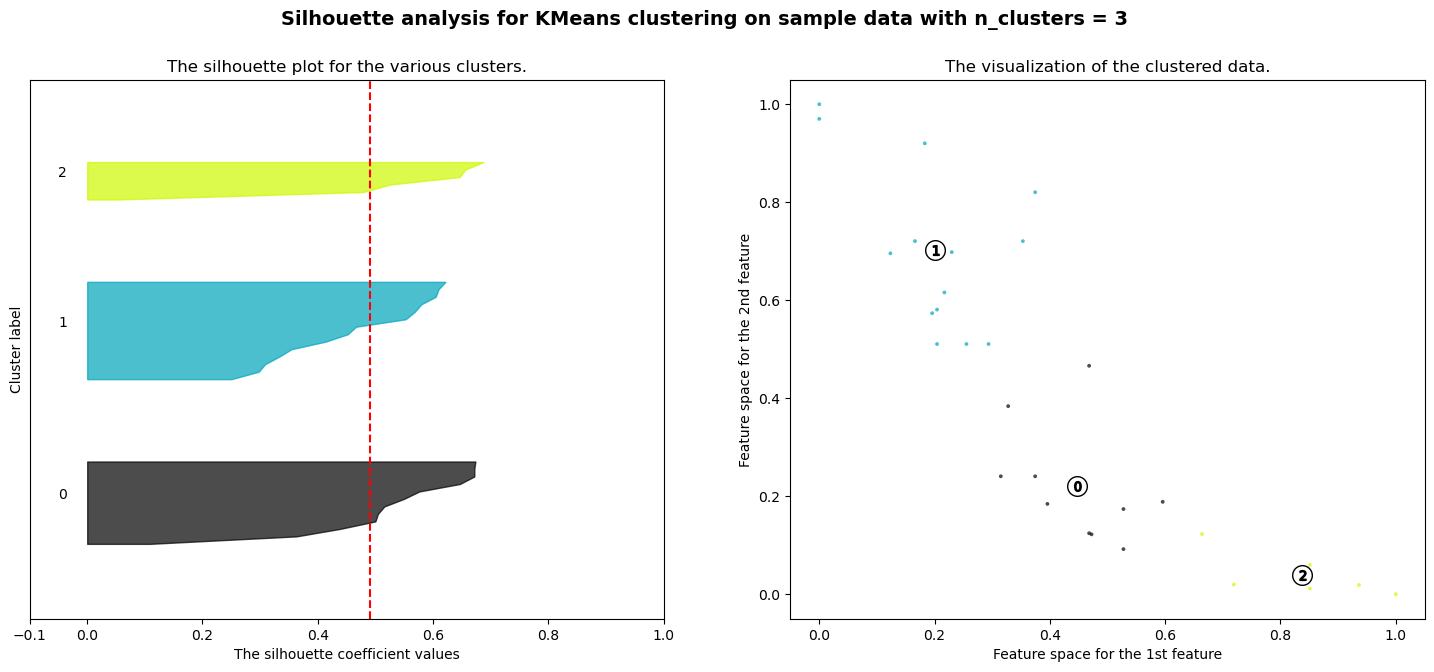

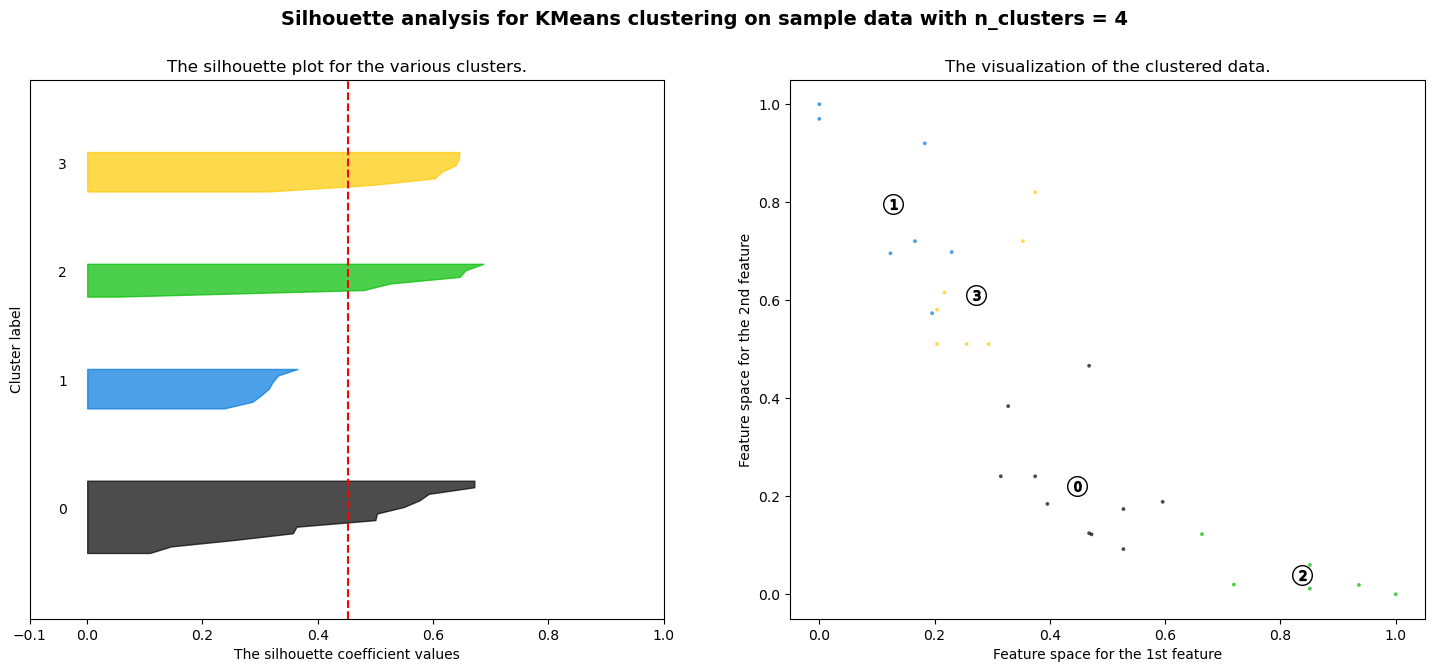

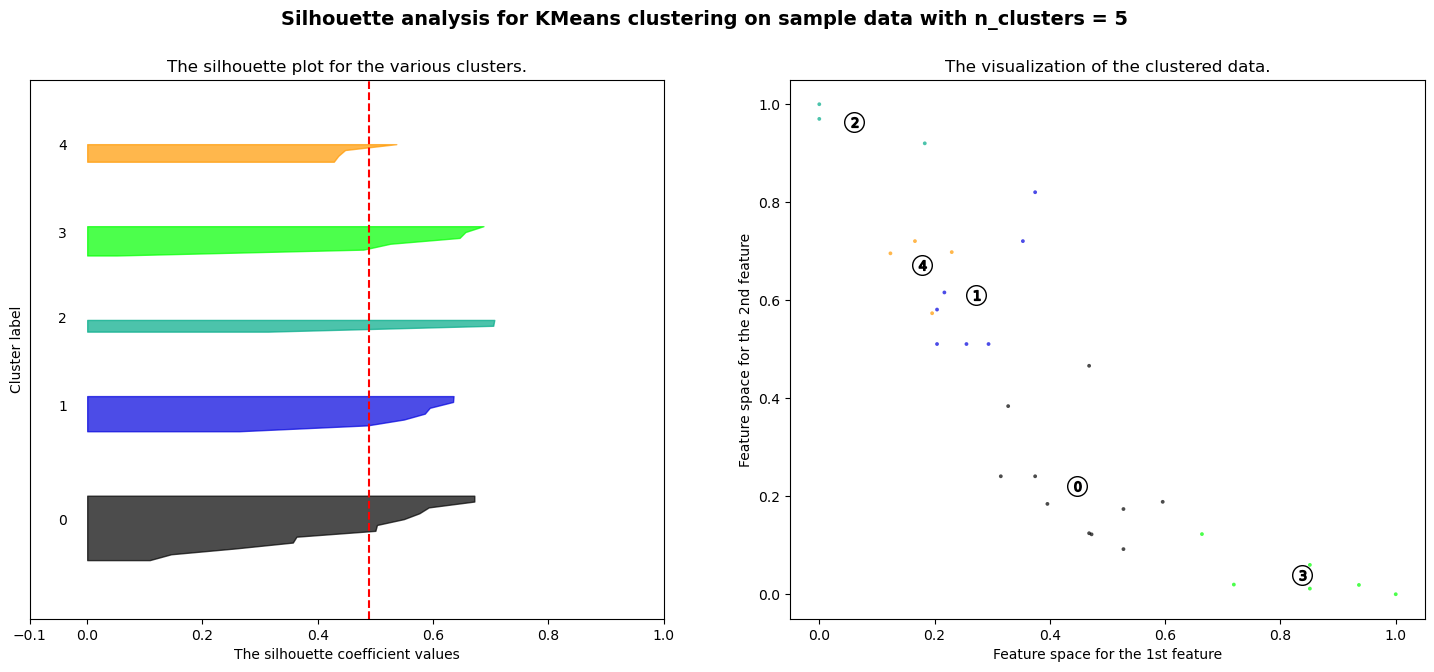

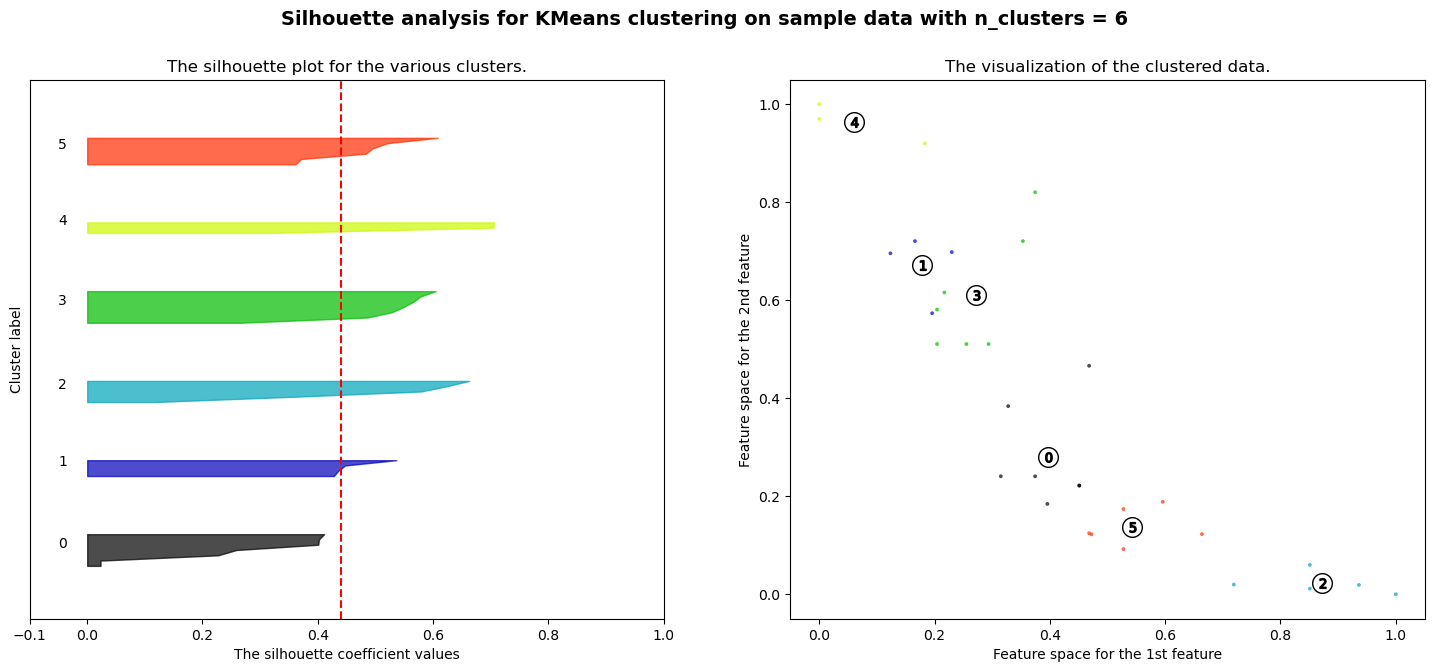

In [74]:
import matplotlib.cm as cm

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters,init='k-means++', n_init=10, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()